In [48]:
from scipy.optimize import minimize
import numpy as np
from sympy import diff, symbols, exp, log, log, tan, ln, cos
import matplotlib.pyplot as plt

### 2
Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$. Ответ округлите до одного знака после запятой. 

Hint. Представьте функцию $f(x)$ как $e^{g(x)}$ для некоторой g.

$$ (ln x + 1 ) \cdot x^x $$

In [6]:
round(2 * np.e**np.e, 1)

30.3

In [11]:
x = symbols('x')
diff(x**x)

x**x*(log(x) + 1)

### 3
Посчитайте производную  $f(x) = tg(x) \cdot \ln(\cos(x^2) + 1), в\ точке\ 0$. Ответ округлите до двух знаков после запятой.

In [16]:
x = symbols('x')
eq = diff(tan(x) * log(cos(x*x) + 1))
eq

-2*x*sin(x**2)*tan(x)/(cos(x**2) + 1) + (tan(x)**2 + 1)*log(cos(x**2) + 1)

In [24]:
round(np.log(2), 2)

0.69

### 4
Ваше задание - написать python-функцию, которая в качестве аргумента принимает:

- числовую функцию $f$, у которой необходимо вычислить производную
- число $\varepsilon$ - его необходимо использовать в качестве "малого отклонения" для приближённого вычисления производной.


Функция должна в свою очередь возвращать числовую функцию $f'$, равную производной функции $f$.


Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически. Производную следует вычислять по формуле
$$ f'(x) \approx \frac{f(x + \varepsilon) - f(x)}{\varepsilon}$$


In [25]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        return (func(x + epsilon) - func(x)) / epsilon
    return deriv_func

### 5
В этом задании Вы должны найти минимум функций с помощью градиентного спуска.

Вам на вход подаются:
- функция func
- ее производная deriv (*)
- а также начальная точка start, 

на выходе - точка локального минимума.


Для вашего удобства мы написали функцию для отрисовки траектории градиентного спуска


В первой реализации градиентного спуска можете предполагать, что на вход подаются функции с единственным, глобальным минимумом. 

In [81]:
def grad_descent_v1(func, deriv, start=None, callback=None, n_iter=20000, lr=0.01, eps=1e-6, debug=None):
    if start is None:
        np.random.seed(179)
        start = np.random.randn()

    estimate = start
    curr_state = func(estimate)
    
    if callback:
        callback(estimate, curr_state)
    
    i = 0
    while True:
        estimate -= deriv(estimate) * lr
        
        old_state = curr_state
        curr_state = func(estimate)
        i += 1
        if callback:
            callback(estimate, curr_state)
        if i == n_iter or abs(curr_state - old_state) < eps:
            break
    if debug:
        print(i, curr_state, old_state, estimate)
    return estimate

In [8]:
func = lambda x: (x - 5)**2
deriv = lambda x: 2*(x - 5)
grad_descent_v1(func, deriv)
minimize(func, np.random.randn())['x'][0]

344 2.3614562736554184e-05 2.458825774318536e-05 4.995140518264614


5.000000021710189

In [9]:
func = lambda x: (x - 1)**8 + x**4 + x**2 + 1
deriv = lambda x: 8*(x - 1)**7 + 4*x**3 + 2*x
grad_descent_v1(func, deriv, lr=0.1)
minimize(func, np.random.randn())['x'][0]

5 1.1556240719846407 1.1556240935754019 0.29498047011994505


0.2949799132231019

____

In [82]:
def grad_descent_v2(func, deriv, low=None, high=None, callback=None, n_sec=10, debug=None):
    history = [0] * n_sec
    if low and high:
        space = np.linspace(low, high, n_sec+1)
        for i in range(n_sec):
            point = np.random.uniform(low=space[i], high=space[i+1])
            some_x = grad_descent_v1(func, deriv, start=point, debug=debug)
            best = best if func(best) < func(some_x) else some_x
    return best

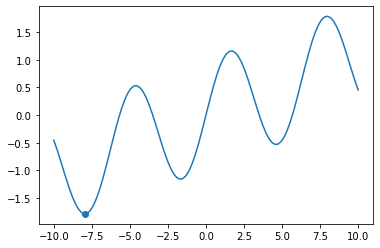

In [79]:
func = lambda x: np.sin(x) + x * 0.1
deriv = lambda x: np.cos(x) + 0.1
x = np.linspace(-10, 10, 100)
plt.plot(x, func(x));
point = -7.964086677348082
plt.scatter([point], [func(point)])

In [88]:
from scipy.optimize import minimize

def grad_descent_v1(func, deriv, start=None, callback=None, n_iter=20000, lr=0.001, eps=1e-6, debug=None):
    if start is None:
        np.random.seed(179)
        start = np.random.randn()

    estimate = start
    curr_state = func(estimate)
    
    if callback:
        callback(estimate, curr_state)
    
    i = 0
    while True:
        estimate -= deriv(estimate) * lr
        old_state = curr_state
        curr_state = func(estimate)
        i += 1
        
        if callback:
            callback(estimate, curr_state)
        if i == n_iter or abs(curr_state - old_state) < eps:
            break
    if debug:
        print(i, curr_state, old_state, estimate)
    return estimate


def grad_descent_v2(func, deriv, low=None, high=None, callback=None, n_sec=2000, debug=None):
    best = np.random.randn() or low
    if low and high:
        space = np.linspace(low+0.5, high-0.5, n_sec+1)
        for i in range(n_sec):
            point = np.random.uniform(low=space[i], high=space[i+1])
            some_x = minimize(func, point)['x'][0]
            best = best if func(best) < func(some_x) else some_x
        if debug:
            print(history)
            print(history[0][1])
        return best
    return grad_descent_v1(func, deriv)
        
    
    


In [87]:
func = lambda x: x**20 + x**2 - 20 * x + 10
deriv = lambda x: 20*x**19 + 2*x - 20
grad_descent_v2(func, deriv, low=-10, high=10)

0.9945020218195472

In [84]:
print(grad_descent_v2(func, deriv, low=-10, high=10))
minimize(func, -8.456204508055315)['x'][0]

-7.94423314956895


-7.954154305398493

___

Вычислите градиент следующей функции

$$ \psi(x,y,z) = \ln(\cos(e^{x+y})) - \ln(xy) $$

Запишите ответ в виде строки $ (\psi_{x}^{'})*i + (\psi_{y}^{'})*j $

In [15]:
x = symbols('x')
y = symbols('y')
diff(log(cos(exp(x+y))) - log(x*y), x)

-exp(x + y)*sin(exp(x + y))/cos(exp(x + y)) - 1/x

In [16]:
diff(log(cos(exp(x+y))) - log(x*y), y)

-exp(x + y)*sin(exp(x + y))/cos(exp(x + y)) - 1/y